In [ ]:
import gdown, IPython 
gdown.download('https://drive.google.com/file/d/1kPqeQBxGz6lpNCuS2JF2EQu16uVtFOOL/view?usp=share_link', 'decorated_header.html', quiet=True, fuzzy=True)
IPython.display.HTML(filename="decorated_header.html") # the author of the style: https://codepen.io/juanbrujo/pen/DBKxxM

### **Dane**
https://www.worldbank.org

In [ ]:
!pip install pandas
!pip install plotly

In [ ]:
# Pobranie obrazku
import gdown
data_url = 'https://drive.google.com/file/d/1RL37qASQ2h4QteT5NwnsyH0VsJPIL8Lk/view?usp=share_link'
data_file = 'annual-co2-emissions-per-country.csv'
gdown.download(data_url, data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1RL37qASQ2h4QteT5NwnsyH0VsJPIL8Lk
To: /content/annual-co2-emissions-per-country.csv
100%|██████████| 855k/855k [00:00<00:00, 64.4MB/s]


'annual-co2-emissions-per-country.csv'

### **Definiowanie krajów Unii Europejskiej**

In [ ]:
ue_countries = {
    "AUT": "Europa Zachodnia",  # Austria
    "BEL": "Europa Zachodnia",  # Belgium
    "BGR": "Europa Środkowo-Wschodnia",  # Bulgaria
    "HRV": "Europa Środkowo-Wschodnia",  # Croatia
    "CYP": "Europa Południowa",  # Cyprus
    "CZE": "Europa Środkowo-Wschodnia",  # Czech Republic
    "DNK": "Europa Północna",  # Denmark
    "EST": "Europa Środkowo-Wschodnia",  # Estonia
    "FIN": "Europa Północna",  # Finland
    "FRA": "Europa Zachodnia",  # France
    "DEU": "Europa Zachodnia",  # Germany
    "GRC": "Europa Południowa",  # Greece
    "HUN": "Europa Środkowo-Wschodnia",  # Hungary
    "IRL": "Europa Zachodnia",  # Ireland
    "ITA": "Europa Południowa",  # Italy
    "LVA": "Europa Środkowo-Wschodnia",  # Latvia
    "LTU": "Europa Środkowo-Wschodnia",  # Lithuania
    "LUX": "Europa Zachodnia",  # Luxembourg
    "MLT": "Europa Południowa",  # Malta
    "NLD": "Europa Zachodnia",  # Netherlands
    "POL": "Europa Środkowo-Wschodnia",  # Poland
    "PRT": "Europa Południowa",  # Portugal
    "ROU": "Europa Środkowo-Wschodnia",  # Romania
    "SVK": "Europa Środkowo-Wschodnia",  # Slovakia
    "SVN": "Europa Południowa",  # Slovenia
    "ESP": "Europa Południowa",  # Spain
    "SWE": "Europa Północna"  # Sweden
}


In [ ]:
ue_countries_full_name = {
    "AUT": "Austria",
    "BEL": "Belgia",
    "BGR": "Bułgaria",
    "HRV": "Chorwacja",
    "CYP": "Cypr",
    "CZE": "Czechy",
    "DNK": "Dania",
    "EST": "Estonia",
    "FIN": "Finlandia",
    "FRA": "Francja",
    "DEU": "Niemcy",
    "GRC": "Grecja",
    "HUN": "Węgry",
    "IRL": "Irlandia",
    "ITA": "Włochy",
    "LVA": "Łotwa",
    "LTU": "Litwa",
    "LUX": "Luksemburg",
    "MLT": "Malta",
    "NLD": "Holandia",
    "POL": "Polska",
    "PRT": "Portugalia",
    "ROU": "Rumunia",
    "SVK": "Słowacja",
    "SVN": "Słowenia",
    "ESP": "Hiszpania",
    "SWE": "Szwecja"
}

In [ ]:
def open_file():
    file_name = 'annual-co2-emissions-per-country.csv'

    data = {}  # Słownik przechowujący dane podzielone na zbiory na podstawie roku



    with open(file_name, 'rt') as file:

        # -- Odczytanie nagłówków kolumn
        headers = file.readline().rstrip().split(',')

        for row in file:
            dictionary = {}  # Tworzenie nowego slownika dla kazdego rekordu
            record = row.rstrip().split(',')  # Podział wiersza na pola

            for key, value in zip(headers, record):
                dictionary[key] = value  # Dodanie klucza i wartości do słownika

                if key == 'Year':
                    dictionary[key] = int(value)  # Konwersja wartości "Year" na typ int

                if key == 'Annual CO2 emissions':
                    dictionary[key] = float(
                        value)  # Konwersja wartości "Annual CO2 emissions" na typ float

            # Sprawdzenie czy kod kraju nalezy do UE
            if dictionary['Code'] in ue_countries:

                year = dictionary['Year']
                country_code = dictionary['Code']

                if year in data:
                    data[year].append(dictionary)  # Dodanie rekordu do istniejącego zbioru dla danego roku
                else:
                    data[year] = [dictionary]  # Utworzenie nowego zbioru dla danego roku zawierającego tylko ten rekord

                # Usuwanie danych z lat przed 1950 rokiem (tylko dla wyszukiwania po 'country_code')
                if year < 1950:
                    continue

                if country_code in data:
                    data[country_code].append(dictionary)  # Dodanie rekordu do istniejącego zbioru dla danego państwa
                else:
                    data[country_code] = [dictionary]

 #   print(data)
    return headers, data


headers, data = open_file()

# Przykład wyświetlenia danych dla konkretnego roku (np. 2020)
year = 2020
dataset_2020 = []
if year in data:
    print(f"Dane dla roku {year}:")
    for record in data[year]:
        dataset_2020.append(record)
        print(record)
else:
    print(f"Brak danych dla roku {year}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### **Wykres TreeMap**

In [ ]:
data_to_treeMap = {
    'Country': [country for country in ue_countries.keys()],  # Lista krajów
    'Region': list(ue_countries.values()),  # Lista regionów dla każdego kraju
    'Emission': []  # Lista emisji CO2 dla każdego kraju
}

# Przechodzenie przez każdy kraj z eu_countries
for country_code in ue_countries.keys():
    country_data = []
    if country_code in data:  # Sprawdzenie, czy istnieją dane dla danego kraju
     #   print(f"Dane dla kraju {country_code}:")
        annual_emission = 0
        for record in data[country_code]:  # Przechodzenie przez rekordy danych dla danego kraju
     #       print(record)
            country_data.append(record)  # Dodanie rekordu do danych dla kraju
            annual_emission += record['Annual CO2 emissions']  # Sumowanie emisji CO2 dla kraju
        data_to_treeMap['Emission'].append(annual_emission)  # Dodanie sumy emisji CO2 do listy
    else:
        print(f"Brak danych dla kraju {country_code}")




In [ ]:
# Zamiana 'country_code' na pełną nazwę kraju
for i in range(len(data_to_treeMap['Country'])):
    country_code = data_to_treeMap['Country'][i]
    if country_code in ue_countries_full_name:
        data_to_treeMap['Country'][i] = ue_countries_full_name[country_code]



In [ ]:
# Tworzenie obiektu DataFrame z danymi
df = pd.DataFrame(data_to_treeMap)

# Konwersja wartości emisji na miliony
df['Emission'] = df['Emission'] / 1000000

# Tworzenie treemap
fig = px.treemap(df, path=['Region', 'Country'], values='Emission', color='Region')

fig.batch_animate()
# Aktualizacja układu i wyglądu wykresu
fig.update_traces(root_color="lightgrey",
                  hovertemplate='<b>%{label}</b><br>Emission: %{value:.2f} mln MtCO2',
                  texttemplate='%{label}',
                  textposition='middle center')

fig.update_layout(title='Emisje CO2 w krajach UE',
                  margin=dict(t=50, l=25, r=25, b=25),
                  treemapcolorway=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])
# Wyświetlanie wykresu
fig.show()

Wykres Treemap jest interaktywny. Można kliknąć region i się powiększy.


---




In [ ]:
def prepare_and_plot_data(region):
    # Wybór kraje z danego regionu
    countries = [country_code for country_code, country_region in ue_countries.items() if country_region == region]

    # Przygotowanie danych dla krajów z danego regionu
    region_data = []

    for country_code in countries:
        country_data = data.get(country_code, [])
        if country_data:
            country_name = country_data[0]['Entity']
            country_years = [record['Year'] for record in country_data]
            country_emissions = [record['Annual CO2 emissions'] for record in country_data]
            region_data.append((country_name, country_years, country_emissions))

    # Wykres liniowy dla każdego kraju z danego regionu
    for country_name, years, emissions in region_data:
        plt.plot(years, emissions, label=country_name)

    plt.xlabel('Rok')
    plt.ylabel('Emisje CO2')
    plt.title(f'Emisje CO2 w krajach regionu "{region}"')
    plt.legend()
    plt.grid(True)

    # Wyświetlenie wykresu dla danego regionu
    plt.show()


In [ ]:
#prepare_and_plot_data("Europa Północna")
#prepare_and_plot_data("Europa Południowa")
#prepare_and_plot_data("Europa Środkowo-Wschodnia")
#prepare_and_plot_data("Europa Zachodnia")

In [ ]:
# Tworzenie obiektu Figure
fig = go.Figure()


# Funkcja do przygotowania i dodania danych do wykresu
def prepare_and_add_trace(region):
    # Wybór państw z poszczególnych regionów
    countries = [country_code for country_code, country_region in ue_countries.items() if country_region == region]

    region_data = []

    for country_code in countries:
        country_data = data.get(country_code, [])
        if country_data:
            country_name = country_data[0]['Entity']
            country_years = [record['Year'] for record in country_data]
            country_emissions = [record['Annual CO2 emissions'] for record in country_data]
            region_data.append((country_name, country_years, country_emissions))

    for country_name, years, emissions in region_data:
        fig.add_trace(go.Scatter(x=years, y=emissions, name=country_name))


# Dodanie danych dla różnych regionów
prepare_and_add_trace("Europa Północna")
prepare_and_add_trace("Europa Południowa")
prepare_and_add_trace("Europa Środkowo-Wschodnia")
prepare_and_add_trace("Europa Zachodnia")

# Stworzenie układu i wyglądu wykresu
fig.update_layout(
    xaxis_title='Rok',
    yaxis_title='Emisje CO2',
    title='Emisje CO2 w krajach UE',
    margin=dict(t=50, l=25, r=25, b=25),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    treemapcolorway=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"],
    uniformtext=dict(minsize=10, mode='hide')
)

# Wyświetlenie przycisków do zmiany wykresu
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            buttons=list([
                dict(
                    label="Europa Północna",
                    method="update",
                    args=[{"visible": [True] * 3 + [False] * (len(fig.data) - 3)}],
                 #   active=True
                ),
                dict(
                    label="Europa Południowa",
                    method="update",
                    args=[{"visible": [False] * 3 + [True] * 7 + [False] * (len(fig.data) - 10)}]
                ),
                dict(
                    label="Europa Środkowo-Wschodnia",
                    method="update",
                    args=[{"visible": [False] * 10 + [True] * 10 + [False] * (len(fig.data) - 20)}]
                ),
                dict(
                    label="Europa Zachodnia",
                    method="update",
                    args=[{"visible": [False] * 20 + [True] * 7 + [False] * (len(fig.data) - 27)}]
                )
            ]),
            active=0,
            showactive=True
        )
    ],
    template={
        "layout": {
            "hoverlabel": {"bgcolor": "darkgreen", "font": {"color": "blue"}},
            "updatemenudefaults": {
                "bgcolor": "lightgreen",
                "bordercolor": "black",
                "font": {"color": "black", "size": 14},
                "pad": {"r": 20}
            }
        }
    }
)

# Wyświetlenie wykresu
fig.show()


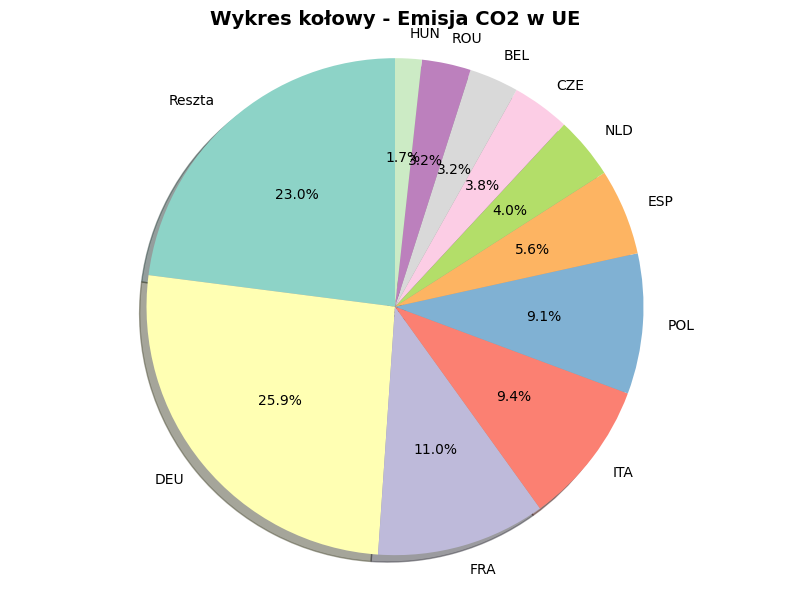

In [ ]:

# Dane dla wykresu kołowego
labels = ue_countries

sizes = []

for key, value in data.items():
    if len(value) == 72:
        total_emissions = 0

        for record in data[key]:
            total_emissions += record['Annual CO2 emissions']

        sizes.append(total_emissions)

# Sortowanie danych
sorted_data = sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_sizes = zip(*sorted_data)

# Przygotowanie etykiet i rozmiarów dla wykresu
display_labels = list(sorted_labels)
display_sizes = list(sorted_sizes)

# Obliczanie sumy dla rekordów poniżej 1,5%
other_size = sum([size for size in display_sizes if size / sum(display_sizes) < 0.04])

# Filtrowanie rekordów poniżej 1,5%
filtered_labels = []
filtered_sizes = []

# Dodanie sekcji "Reszta"
filtered_labels.append("Reszta")
filtered_sizes.append(other_size)

for label, size in zip(display_labels, display_sizes):
    if size / sum(display_sizes) >= 0.0185:
        filtered_labels.append(label)
        filtered_sizes.append(size)

# Stylizacja wykresu
colors = plt.cm.Set3(range(len(filtered_labels)))

plt.figure(figsize=(8, 6))
plt.pie(filtered_sizes, labels=filtered_labels, colors=colors, autopct=lambda pct: f"{pct:.1f}%", shadow=True,
        startangle=90)  #

plt.axis('equal')

plt.title('Wykres kołowy - Emisja CO2 w UE', fontsize=14, fontweight='bold')

plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


In [ ]:
# Przygotowanie zbioru danych od w okresie ... do 2020 roku
datasets = []
for year in range(1792, 2022):
  if year in data:
      dataset = []
      for record in data[year]:
          dataset.append(record)
      datasets.append(dataset)
  else:
      print(f"Brak danych dla roku {year}")

### **Rysowanie map (1792 - 2021)**
> Na podstawie kodu z części I projektu

In [ ]:
# PRZYGOTOWANIE MAPY

!pip -q install geopandas

import csv
import gdown                        
import geopandas as gpd  
from bs4 import BeautifulSoup as BS
from urllib.request import urlopen
import matplotlib.pyplot as plt                            
from mpl_toolkits.axes_grid1 import make_axes_locatable   
import matplotlib.patheffects as path_effects            
import matplotlib.ticker as ticker

gdown.download('https://drive.google.com/file/d/1QYPzX9vBs2E-DFi44Ry4Ed-vjbcJtNQH/view?usp=share_link', 
               'NUTS_RG_01M_2021_3035_LEVL_0.json', quiet=True, fuzzy=True)  
regions = gpd.read_file('NUTS_RG_01M_2021_3035_LEVL_0.json')

html = urlopen("https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes")
soup = BS(html)
countries_and_code = soup.find_all('td')
countries_raw, codes_raw = [[] for i in range(2)]

for i in range(54):
  if i % 2 == 0:
    countries_raw.append(countries_and_code[i].text)
  else:
    codes_raw.append(countries_and_code[i].text)
countries = [item.replace('(','').replace(')','').replace('\n','') for item in countries_raw]
codes = [item.replace('(','').replace(')','').replace('\n','') for item in codes_raw]  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.0 MB/s eta 0:00:00


In [ ]:
import warnings                                                                   # Magiczne zaklęcie rozwiązujące problem
warnings.filterwarnings("ignore")                                                 # niepotrzebnego warning'a

In [ ]:
import os                                                                         # Przygotowanie katalogu, w którym będziemy
os.mkdir('maps')                                                                  # zapisywać wygenerowane mapy

In [ ]:
# FUNKCJA RYSUJĄCA MAPĘ

codes_dictionary = dict(zip(countries, codes))

def get_key_by_value(my_dict, value):
    for key, val in my_dict.items():
        if val == value:
            return key
    return None

def plot_map(year, colour_map):
  fig, ax = plt.subplots(figsize=(10,10))
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("bottom", size="2%", pad=0.3)

  title = 'Roczna emisja dwutlenku\nwęgla: ' + year
  fig.suptitle(title, fontsize=13, y=0.85, x=0.15, ha='left', family='serif')
  fig = ax.figure
  cb_ax = fig.axes[1] 
  cb_ax.tick_params(labelsize=10)
  primary_column = 'co2_emissions'

  def millions_formatter(x, pos):                                                  # Zmieniamy wygląd color bar
    return "{:.1f}x$10^6$".format(x/1e6)                                           # Zmieniamy wygląd color bar

  regions.plot(
      column=primary_column, 
      ax=ax, 
      legend=True, 
      cax=cax, 
      cmap=colour_map, 
      legend_kwds={'label': 'Miliony ton', 'orientation': 'horizontal',
                   'format': ticker.FuncFormatter(millions_formatter)},            # Zmieniamy wygląd color bar
      missing_kwds=dict(color = "white"),
      edgecolor='white',
      linewidth=0.1,
      vmin=0, 
      vmax=7e8
  )

  ax.set_xlim(xmin=2.2e6, xmax=6.8e6)
  ax.set_ylim(ymin=1e6, ymax=5.4e6)

  ax.set(xticklabels=[])
  ax.set(yticklabels=[])
  ax.tick_params(axis='both', which='both', length=0)

  cb_ax.locator = ticker.FixedLocator([0, 100, 200, 300, 400, 500, 600, 700])      # Zmieniamy wygląd color bar
  cb_ax.set_xticklabels(['0', '100', '200', '300', '400', '500', '600', '700'])    # Zmieniamy wygląd color bar

  not_EU_countries = {"IS", "LI", "NO", "CH", "UK", "BA", "ME", "MD", "MK", "AL",
            "RS", "TR", "UA", "XK", "GE"}

  corrected_countries = {
      "FR" : (3.8e6, 2.5e6), "EL" : (5.32e6, 1.9e6), "IE" : (3.15e6, 3.5e6),
      "SE" : (4.58e6, 4.4e6), "PT" : (2.76e6, 2e6), "MT" : (4.8e6, 1.4e6),
      "HR" : (4.87e6, 2.53e6), "CY" : (6.48e6, 1.57e6), "SI" : (4.7e6, 2.6e6)}

  for idx, row in regions.iterrows():
      code = row["CNTR_CODE"]
      country_name = get_key_by_value(codes_dictionary, code)

      if code not in not_EU_countries:
        if code in corrected_countries:
          position = corrected_countries[code]
        else:
          position = row["geometry"].centroid.coords[0]
        
      text = ax.annotate(text=country_name, xy=position, fontsize=7, color='black', ha="center", va="center")
      text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])
 
  path = 'maps/' + year + '_co2_map.png'
  plt.savefig(path, dpi=300)

  plt.close()

In [ ]:
# WSTAWIENIE DANYCH
regions = regions.assign(co2_emissions=0)  

def plot_maps(datasets):
  for dataset in datasets:

    for entity in codes_dictionary.keys():
      for i in range(len(dataset)):
        if dataset[i]['Entity'] == entity:
          dataset[i]['Code'] = codes_dictionary[entity]

    emissions_by_code = {}
    for record in dataset:
      emissions_by_code[record['Code']] = record['Annual CO2 emissions']

    for index, row in regions.iterrows():
      if row['CNTR_CODE'] in emissions_by_code:
        regions.loc[index, 'co2_emissions'] = emissions_by_code[row['CNTR_CODE']]
      else:
        regions.loc[index, 'co2_emissions'] = float('NaN')
    regions['co2_emissions'] = regions['co2_emissions'].astype(float)

    plot_map(str(dataset[0]['Year']), 'Oranges')
    print("Wygenerowano mapę: " + str(dataset[0]['Year']))

In [ ]:
# Generowanie map (~ 15 min)
plot_maps(datasets)

In [ ]:
# Pobranie wygenerowanych map
!zip -r -q maps/all_maps.zip maps/

from google.colab import files
files.download('maps/all_maps.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Odtwarzanie przygotowanego filmiku
import gdown
gdown.download('https://drive.google.com/file/d/10V6uzCBFlo-B_llDkTUOOheDCA1VT19c/view?usp=sharing', 
               'dynamic_changes.mp4', quiet=True, fuzzy=True)  

from IPython.display import HTML
from base64 import b64encode
import os

file = "/content/dynamic_changes.mp4"
compressed = "/content/dynamic_changes_compressed.mp4"
os.system(f"ffmpeg -i {file} -vcodec libx264 {compressed}")
mp4 = open(compressed,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=1300 controls><source src="%s" type="video/mp4"></video>""" % data_url)

Output hidden; open in https://colab.research.google.com to view.